Task 2.2.

Рассмотрим пилообразный сигнал

In [36]:
from thinkdsp import Signal
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Signal):
    def __init__(self, freq=100, amp=1, offset=0, func=np.sin):
        self.freq = freq
        self.amp = amp
        self.offset = offset
        self.func = func

    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

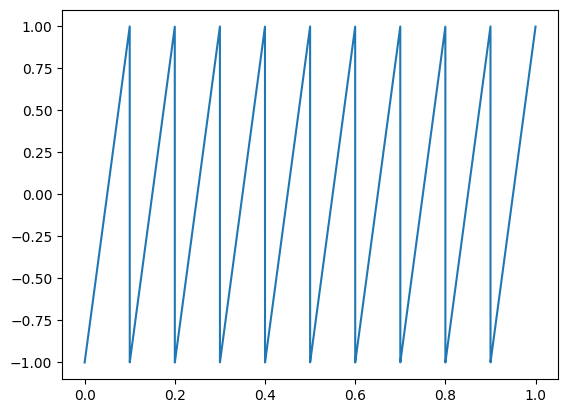

In [38]:
sawtoothsignal = SawtoothSignal(10)
wave = sawtoothsignal.make_wave()
wave.plot()

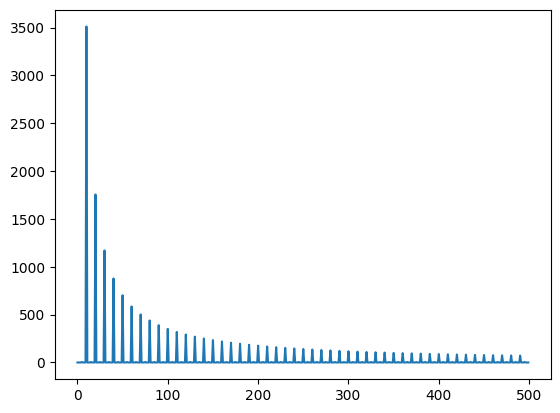

In [42]:
spectrum = wave.make_spectrum()
spectrum.plot(high=500)

Если сравнивать полученный спектр с треугольным и прямоугольным сигналом, то, в отличие от треугольного, пилообразный сигнал убывает со скорость 1/f, а треугольный 1/f^2. Скорость убывания прямоугольного сигнала совпадает с пилообразным, однако пилообразный сигнал содержит как четные, так и нечетные гармоники, в отличии от прямоугольного.

Task 2.3.

Рассмотрим биение на примере прямоугольного сигнала с частотой 1100 Гц.

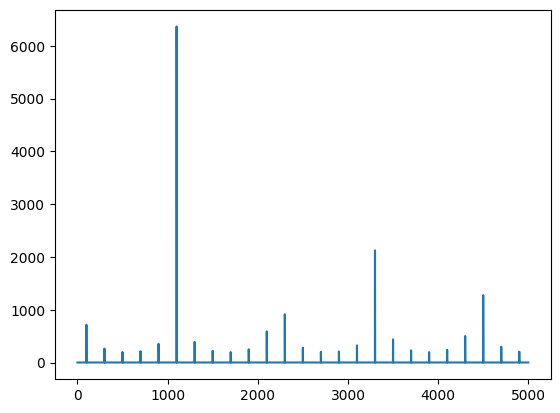

In [8]:
from thinkdsp import SquareSignal

wave = SquareSignal(freq=1100).make_wave(framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()

По спектру видно, что появились пики, не кратные основной частоте. Все в результате заворота. При прослушивании аудио это также легко различить.

In [47]:
wave.make_audio()

Task 2.4.

Создадим треугольный сигнал и распечатаем его спектр.

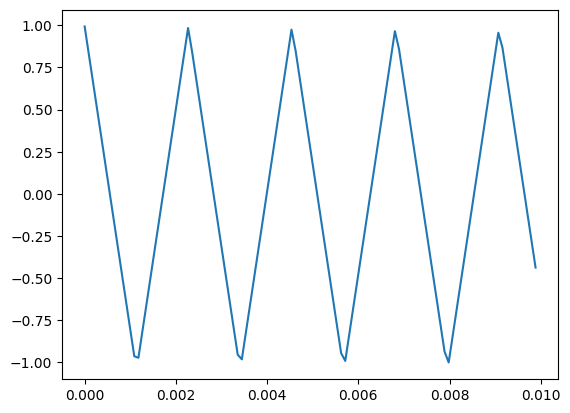

In [52]:
from thinkdsp import TriangleSignal

signal = TriangleSignal()
wave = signal.make_wave(duration=0.01)
wave.plot()

In [53]:
spectrum = wave.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

Первый элемент спектра приблизительно равен нулю. Попробуем изменить его и изучить, как это повлияет на наш сигнал

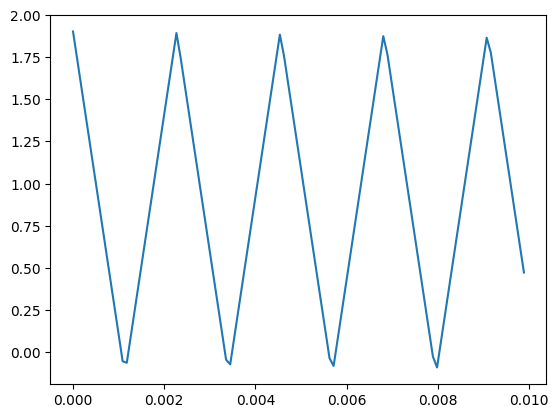

In [54]:
spectrum.hs[0] = 100
spectrum.make_wave().plot()

Видно, что спектр нашего сигнала сместился по оси Y. То есть изменение первого элемента спектра меняет среднее значение сигнала и приводит к смещению постоянного тока.

Task 2.5.

Применим функцию, изменяющую спектр путем деления каждого элемента hs на соответствующую fs, на прямоугольном сигнале и рассмотрим результат.

In [55]:
def filter(spectrum):
    spectrum.hs[0] = 0
    spectrum.hs[1:] /= spectrum.fs[1:]

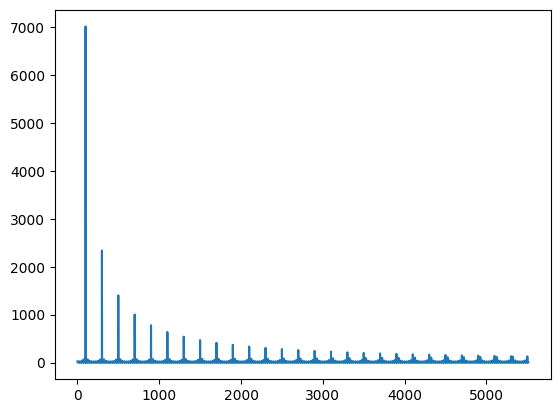

In [61]:
from thinkdsp import SquareSignal

signal = SquareSignal(freq=100)
wave = signal.make_wave()
spectrum = wave.make_spectrum()
spectrum.plot()

In [63]:
spectrum.make_wave().make_audio()

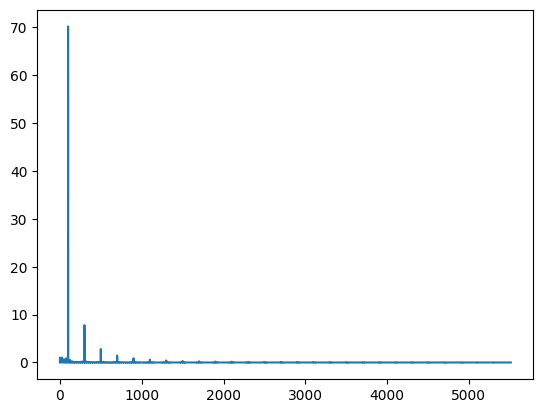

In [59]:
filter(spectrum)
spectrum.plot()

In [60]:
spectrum.make_wave().make_audio()

Легко заметить, что на спектре нашего сигнала удалены высокочастотные гармоники, то есть наша функция сработала как фильтр низких частот.

Task 2.6.

Для получения сигнала с четными и нечетными гармониками, спадающего пропорционально 1/f^2, возьмем пилообразный сигнал, изначально имеющий нужные нам гармоники.

In [70]:
signal = SawtoothSignal(freq=500)
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

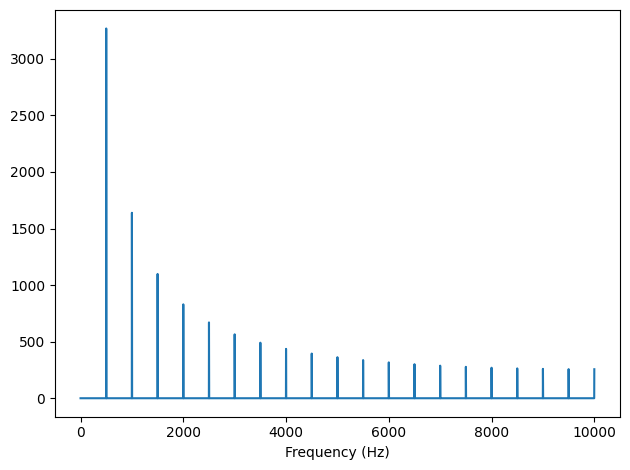

In [72]:
from thinkdsp import decorate

spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

А теперь применим функцию из предыдущего пункта и рассмотрим результат на спектре.

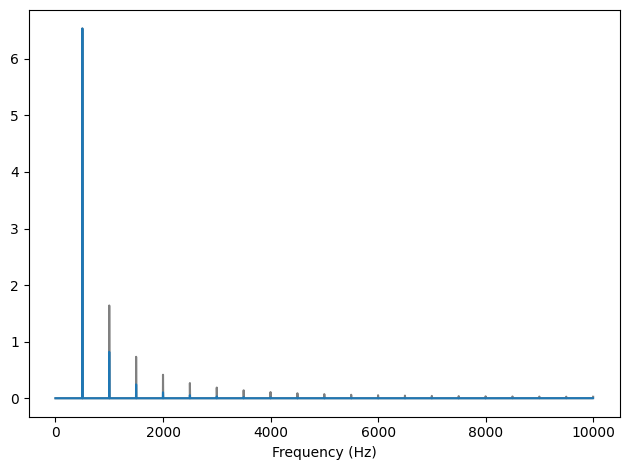

In [75]:
spectrum.plot(color='gray')
filter(spectrum)
spectrum.scale(500)
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

После применения функции, на спектре легко заметить как сигнал, имеющий четные и нечетные гармоники, убывает пропорционально 1/f^2. Вот как он звучит и выглядит на диаграмме:

In [76]:
wave = spectrum.make_wave()
wave.make_audio()

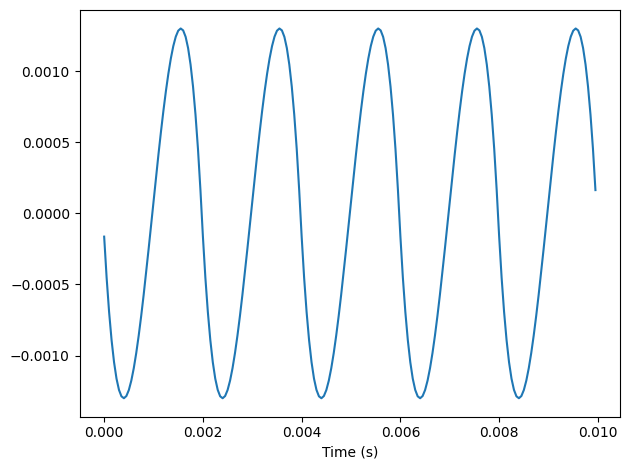

In [77]:
wave.segment(duration=0.01).plot()
decorate(xlabel='Time (s)')